In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
def linear_equation(x):
    return 3 * x + 2

In [ ]:
x_values = [1, 2, 3, 4, 5]
y_values = []

for x in x_values:
    y = linear_equation(x)
    y_values.append(y)

for i in range(len(x_values)):
    print(f"x{i+1} = {x_values[i]}, y{i+1} = {y_values[i]}")


x1 = 1, y1 = 5
x2 = 2, y2 = 8
x3 = 3, y3 = 11
x4 = 4, y4 = 14
x5 = 5, y5 = 17


In [ ]:
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return slope, intercept

In [ ]:
def calculate_mse(actual, predicted):

    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    mse = np.mean(squared_differences)
    return mse

slope, intercept = linear_regression(x_values, y_values)
print(f"The equation of the line that best fits the training data is: y = {slope}x + {intercept}")

y_values_predicted = slope * np.array(x_values) + intercept
mse = calculate_mse(np.array(y_values), y_values_predicted)
print("Mean Squared Error:", mse)

The equation of the line that best fits the training data is: y = 3.0x + 2.0
Mean Squared Error: 0.0


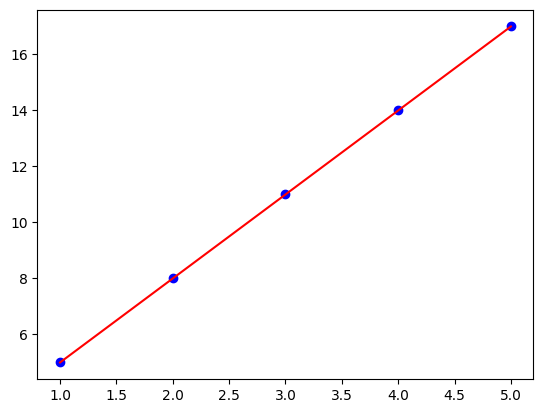

In [ ]:
plt.scatter(x_values, y_values, color='blue', label='Training Data')
plt.plot(x_values, y_values, color='red', label='Line of Best Fit')

plt.show()


In [ ]:
def linear_equation_with_noise(x):
    return 3 * x + 2 + random.uniform(0, 1)

In [ ]:
x_values = np.array([1, 2, 3, 4, 5])
y_values_with_noise = np.array([linear_equation_with_noise(x) for x in x_values])


slope_with_noise, intercept_with_noise = linear_regression(x_values, y_values_with_noise)
print(f"The equation of the line that best fits the training data with random noise is: y = {slope_with_noise}x + {intercept_with_noise}")
y_values_predicted = slope_with_noise * x_values + intercept_with_noise

mse = calculate_mse(y_values_with_noise, y_values_predicted)
print("Mean Squared Error:", mse)


The equation of the line that best fits the training data with random noise is: y = 2.8668459459459172x + 2.8954781029305963
Mean Squared Error: 0.008590750397754615


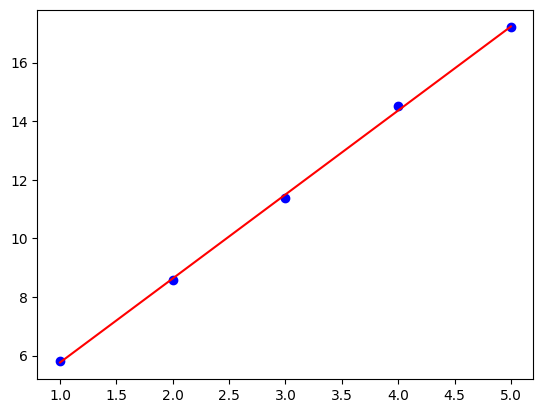

In [ ]:
plt.scatter(x_values, y_values_with_noise, color='blue', label='Training Data')
y_values_predicted = slope_with_noise * x_values + intercept_with_noise
plt.plot(x_values, y_values_predicted, color='red', label='Line of Best Fit')

plt.show()

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_class1 = X[y == 0]
y_class1 = np.zeros(len(X_class1))

X_class2 = X[y != 0]
y_class2 = np.ones(len(X_class2))


In [ ]:
# Split Class I
X_class1_train, X_class1_test, y_class1_train, y_class1_test = train_test_split(X_class1, y_class1, test_size=10, train_size=40, random_state=42)
print("Length of Class I training set:", len(X_class1_train))
print("Length of Class I testing set:", len(X_class1_test))

Length of Class I training set: 40
Length of Class I testing set: 10


In [ ]:
# Split Class II
X_class2_train, X_class2_test, y_class2_train, y_class2_test = train_test_split(X_class2, y_class2, test_size=20, train_size=80, random_state=42)
print("Length of Class II training set:", len(X_class2_train))
print("Length of Class II testing set:", len(X_class2_test))

Length of Class II training set: 80
Length of Class II testing set: 20


In [ ]:
def classify_samples(X_test, y_test):
    predictions = slope * X_test + intercept
    #4
    class_predictions = np.where(predictions >= 0, "Class I", "Other classes")
    #5
    accuracy_of_classI = np.mean(np.where(class_predictions == "Class I", y_test == 0, y_test != 0))
    accuracy_of_classII = np.mean(np.where(class_predictions == "Other classes", y_test == 1, y_test != 1))
    return class_predictions, accuracy_of_classI, accuracy_of_classII

# Reshape prediction array
X_class1_test_reshaped = X_class1_test.reshape(-1, 1)
X_class2_test_reshaped = X_class2_test.reshape(-1, 1)

class1_predictions, class1_accuracy, class2_accuracy = classify_samples(X_class1_test_reshaped, y_class1_test)
class2_predictions, _, _ = classify_samples(X_class2_test_reshaped, y_class2_test)

# Modify class2_predictions
class2_predictions = np.where(class2_predictions == "Class I", "Other classes", class2_predictions)

print("Class I Predictions:", class1_predictions)
print("Class I Accuracy:", class1_accuracy)
print("Class II Predictions:", class2_predictions)
print("Class II Accuracy:", class2_accuracy)


Class I Predictions: [['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']]
Class I Accuracy: 1.0
Class II Predictions: [['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classe

In [ ]:
# class1_predictions = np.where(slope * X_class1_test_reshaped + intercept > 0, "Class I", "Other classes")
# class2_predictions = np.where(slope * X_class2_test_reshaped + intercept < 0, "Class I", "Other classes")

# print("Class I Predictions:", class1_predictions)
# print("Class II Predictions:", class2_predictions)

Class I Predictions: [['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']
 ['Class I']]
Class II Predictions: [['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']
 ['Other classes']

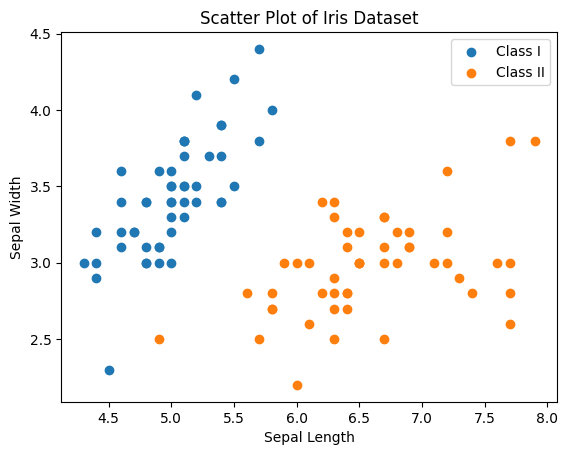

In [ ]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class I')
plt.scatter(X[y_new == 2, 0], X[y_new == 2, 1], label='Class II')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Iris Dataset')

plt.legend()

plt.show()